In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import files


uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [4]:
dataset = pd.read_csv('Wholesale customers data.csv')
X = dataset.iloc[:, [3, 4]].values

In [5]:
X

array([[ 9656,  7561],
       [ 9810,  9568],
       [ 8808,  7684],
       [ 1196,  4221],
       [ 5410,  7198],
       [ 8259,  5126],
       [ 3199,  6975],
       [ 4956,  9426],
       [ 3648,  6192],
       [11093, 18881],
       [ 5403, 12974],
       [ 1124,  4523],
       [12319, 11757],
       [ 6208, 14982],
       [ 9465, 12091],
       [ 1114,  3821],
       [ 8816, 12121],
       [ 6157,  2933],
       [ 6327, 10099],
       [ 2495,  9464],
       [ 4519,  4602],
       [  871,  2010],
       [ 1917,  4469],
       [36423, 22019],
       [ 9776, 13792],
       [ 4230,  7595],
       [  961,  2861],
       [  803,  3045],
       [20484, 25957],
       [ 2100,  2609],
       [ 3610, 11107],
       [ 4339,  3133],
       [ 1318,  2886],
       [ 4786,  7326],
       [ 1979,  2262],
       [ 5491, 11091],
       [ 4362,  5428],
       [10556, 12477],
       [15729, 16709],
       [  555,   902],
       [ 4332,  4757],
       [ 3065,  5956],
       [ 7555, 14961],
       [110

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

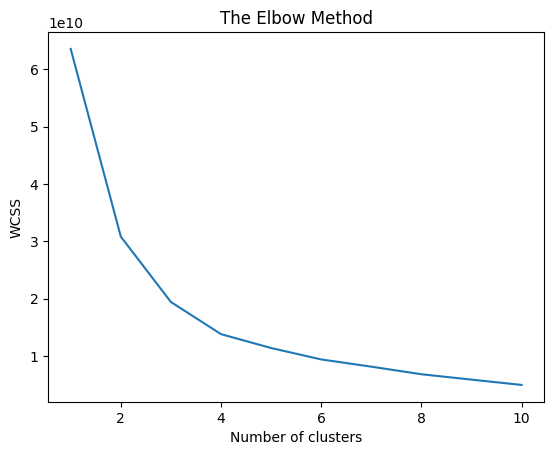

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


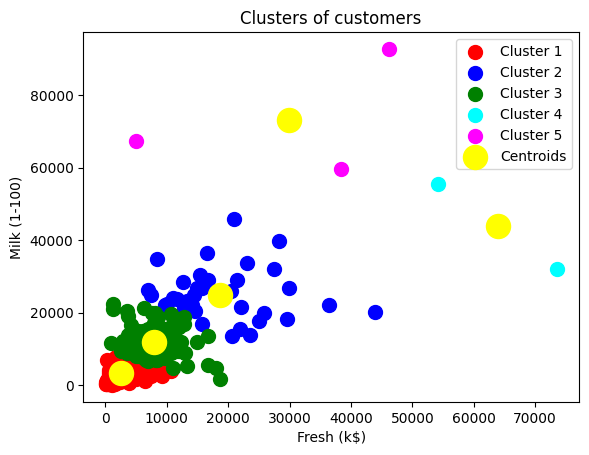

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Fresh (k$)')
plt.ylabel('Milk (1-100)')
plt.legend()
plt.show()

In [9]:
# Calculate the Silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5543864043242497


In [10]:
print("Inertia (WCSS):", kmeans.inertia_)

Inertia (WCSS): 11374700670.219576


In [11]:
#calculate dunn index
# Calculate pairwise distances between data points
from scipy.spatial.distance import pdist, squareform
pairwise_distances = pdist(X)

In [12]:
# Calculate the Dunn index
def dunn_index(data, labels):
    # Calculate the pairwise distances between cluster centers
    cluster_centers = [data[labels == i].mean(axis=0) for i in np.unique(labels)]
    pairwise_distances_centers = pdist(cluster_centers)

    # Calculate the minimum inter-cluster distance
    min_inter_cluster_distance = np.min(pairwise_distances_centers)

    # Calculate the maximum intra-cluster diameter
    max_intra_cluster_diameter = np.max([np.max(squareform(pairwise_distances)[np.ix_(labels == i, labels == i)]) for i in np.unique(labels)])

    return min_inter_cluster_distance / max_intra_cluster_diameter

dunn_score = dunn_index(X, y_kmeans)
print("Dunn Index:", dunn_score)

Dunn Index: 0.21021663904157908
